Este Dataset Trabalha os dados de uma companhia de seguros para automóveis.

# Contexto do Trabalho Prático

O cliente que requisitou este trabalho é uma companhia de seguros que vendeu seguros de saúde aos seus clientes e agora precisa de ajuda para construir um modelo que permita prever se os seus clientes de seguros de saúde tmbém estarão interessados no seguro automóvel fornecido pela empresa.

Uma apólice de seguro é um acordo através do qual uma empresa se compromete a fornecer uma garantia de indemnização por perdas, danos, doença ou morte, em troca do pagamento de um determinado valor monetário através de uma contrato anual, pago mensalmente.

Tal como o seguro de saúde, existe um seguro automóvel em que todos os anos o cliente tem de pagar uma anuidade de um determinado montante à empresa de seguros para que, em caso de acidente com o veículo, a empresa de seguros forneça uma indemnização ao cliente.

A construção de um modelo que permita prever se um cliente está interessado num seguro automóvel é extremamente útil para a empresa, uma vez que esta pode planear a sua estratégia de comunicação para chegar a esses clientes e otimizar o seu modelo de negócio e as suas receitas.

Para prever se o cliente está interessado num seguro automóvel, é necessário dispor de informações sobre dados demográficos (sexo, idade, tipo de código de região), veículos (idade do veículo, danos), apólice (prémio, canal de abastecimento).

Este modelo foi desenvolvido mediante um questionário que fizeram a todos os clientes questionando se estarão interessados em adicionar ao seguro de saúde um seguro automóvel.

Foram disponibilizados para a construção deste modelo 2 Modelos de dados (Dataset), um modelo de treino, que contem a resposta do cliente ao questionário de interesse, e um modelo de teste para testar esta implementação.

# Importação das librarias

In [23]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import tensorflow as tf

In [24]:
# Importação dos modelos de Machine Learning
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
from sklearn.metrics import classification_report

In [26]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ia-tp2/tp2ia.ipynb
/kaggle/input/ia-tp2/sample_submission.csv/sample_submission.csv
/kaggle/input/ia-tp2/train.csv/train.csv
/kaggle/input/ia-tp2/test.csv/test.csv


In [27]:
# Directório dos dataset
os.listdir('/kaggle/input/')

['ia-tp2']

# Importação dos Dataset

In [28]:
ds_treino = pd.read_csv("/kaggle/input/ia-tp2/train.csv/train.csv")
ds_teste = pd.read_csv("/kaggle/input/ia-tp2/test.csv/test.csv")

In [17]:
ds_treino

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

**Informação sobre o tipo de dados do Dataset**

In [29]:
ds_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Descrição das variáveis

| Column Name | Column Description | 
| --- | --- |
| id | Indentificador único do cliente |
| Gender | Género do cliente |
| Age | Idade do cliente |
| Driving_License | 0 - Cliente não tem liçença, 1 - Cliente tem licença |
| Region_Code | Código da região do cliente |
| Previously_Insured | 1 - Cliente tem seguro automóvel, 0 - Cliente não tem seguro automóvel |
| Vehicle_Age | Idade do veículo |
| Vehicle_Damage | 1 - Cliente já teve o carro acidentado. 0 - Cliente ainda não teve o carro acidentado. |
| Annual_Premium | Valor pago pelo cliente por ano |
| Policy_Sales_Channel | Código do canal de fidelização do cliente (telefone, presencial, chamada) |
| Vintage | Número de dias que o cliente está fidelizado à empresa de seguros |
| Response | 1 - Cliente está interessado, 0 - Cliente não está interessado |


**Informação quanto ao conteúdo (Numero de linhas/colunas)**

No dataset de treino tem uma coluna que não existe no dataset de teste. Esta coluna representa o questionario realizado aos clientes da empresa que já possuem seguro de saúde e se estão interessados em seguro automóvel

In [30]:
train_num_rows, train_num_cols = ds_treino.shape
print(f'Dataset Treino \nNúmero de linhas : {train_num_rows}\nNúmero de colunas: {train_num_cols}')

Dataset Treino 
Número de linhas : 381109
Número de colunas: 12


In [31]:
test_num_rows, test_num_cols = ds_teste.shape
print(f'Dataset Teste \nNúmero de linhas : {test_num_rows}\nNúmero de colunas:{test_num_cols}')

Dataset Teste 
Número de linhas : 127037
Número de colunas:11


# Análise das Variàveis

**Esta análise tem como base relacionar a resposta ao questionário com as principais variáveis do Dataset. Deste  modo vamos puder retirar conclusões sobre a importância que estas podem ter para o modelo de previsão que vamos construir**

# Resposta ao questionário

<Axes: ylabel='Response'>

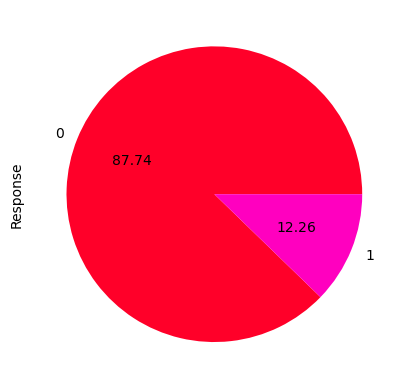

In [34]:
data["Response"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

Podemos concluir que neste dataset apenas 12,26% dos clientes estão interessados em adicionar o seguro automóvel ao de saúde.

# Correlação entre a resposta e o género

In [33]:
fig=px.histogram(ds_treino,
                x='Response',
                marginal='box',
                color='Gender',
                color_discrete_sequence=['#0000CD', '#BA55D3'],
                title='Correlação entre a resposta e o género'
                )
fig.update_layout(bargap=0.1)
fig.show()

Podemos concluir que o género não é um fator determinante para influenciar a resposta e não existe interferencia entre que quer ou não o seguro.

# Correlação entre a resposta e a idade

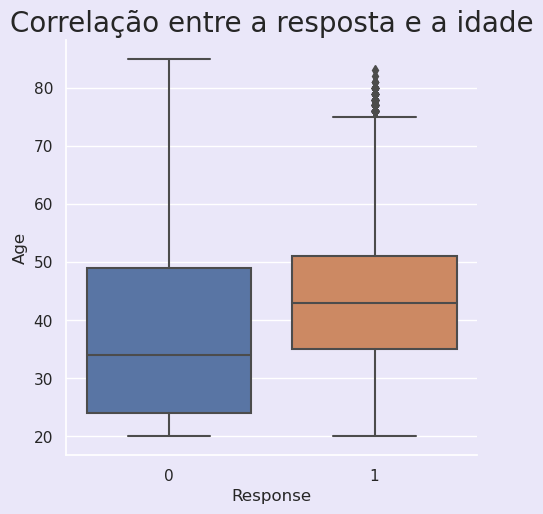

In [37]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Response",y="Age", data=ds_treino, kind='box')
plt.title("Correlação entre a resposta e a idade", size=20, y=1.0);

Podemos concluir que as pessoas entre os 25 e os 35 anos de idade não mostram interesse no seguro automóvel. Já as pessoas entre os 35 e os 50 tem bastante interesse no seguro.

# Correlação entre a Resposta e o Código da região

In [42]:
fig=px.histogram(ds_treino,
                x='Region_Code',
                marginal='box',
                color='Response',
                color_discrete_sequence=['#0000CD', '#BA55D3'],
                title='Correlação entre a Resposta e o Código da região'
                )
fig.update_layout(bargap=0.1)
fig.show()

Podemos concluir que não existe muita correlação entre o código da região e a reposta. Verifica-se um pico de repostas positivas no código de região número 28.

# Correlação entre a resposta e se o cliente já teve o veículo danificado

In [43]:
fig=px.histogram(ds_treino,
                x='Response',
                marginal='box',
                color='Vehicle_Damage',
                color_discrete_sequence=['#0000CD', '#BA55D3'],
                title='Correlação entre a resposta e se o cliente já teve o veículo danificado'
                )
fig.update_layout(bargap=0.1)
fig.show()

Podemos concluir que das pessoas que já tiveram acidentes estão mais propicias a adicionar o seguro automóvel

# Correlação entre a resposta e o prémio anual

In [1]:
fig=px.histogram(ds_treino,
                x='Response',
                marginal='box',
                color='Vehicle_Damage',
                color_discrete_sequence=['#0000CD', '#BA55D3'],
                title='Correlação entre a resposta e se o cliente já teve o veículo danificado'
                )
fig.update_layout(bargap=0.1)
fig.show()

NameError: name 'px' is not defined

# Tratamento dos Dados

In [83]:
data.drop(["id"] , axis = 1 , inplace = True)

In [84]:
data["Gender"] = np.where(data["Gender"] == "Male" , 1 , 0)

In [85]:
data["Vehicle_Damage"] = np.where(data["Vehicle_Damage"] == "Yes" , 1 , 0)

In [90]:
data = pd.concat([pd.get_dummies(data["Vehicle_Age"]) , 
                 data.drop("Vehicle_Age" , axis = 1)] , 
                axis = 1 , join = "inner")

In [91]:
data

1-2 Year  < 1 Year  > 2 Years  Gender  Age  Driving_License  \
0              0         0          1       1   44                1   
1              1         0          0       1   76                1   
2              0         0          1       1   47                1   
3              0         1          0       1   21                1   
4              0         1          0       0   29                1   
...          ...       ...        ...     ...  ...              ...   
381104         1         0          0       1   74                1   
381105         0         1          0       1   30                1   
381106         0         1          0       1   21                1   
381107         0         0          1       0   68                1   
381108         1         0          0       1   46                1   

        Region_Code  Previously_Insured  Vehicle_Damage  Annual_Premium  \
0                28                   0               1           40454   
1                 3                   0               0           33536   
2                28                   0               1           38294   
3                11                   1               0           28619   
4                41                   1               0           27496   
...             ...                 ...             ...             ...   
381104           26                   1               0           30170   
381105           37                   1               0           40016   
381106           30                   1               0           35118   
381107           14                   0               1           44617   
381108           29                   0               0           41777   

        Policy_Sales_Channel  Vintage  Response  
0                         26      217         1  
1                         26      183         0  
2                         26       27         1  
3                        152      203         0  
4                        152       39         0  
...                      ...      ...       ...  
381104                    26       88         0  
381105                   152      131         0  
381106                   160      161         0  
381107                   124       74         0  
381108                    26      237         0  

[381109 rows x 13 columns]

# Estudo dos Dados

**Gráfico referente à distribuição do Dataset em função do Género**

<Axes: ylabel='Gender'>

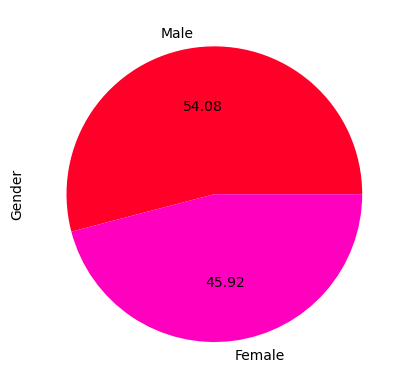

In [16]:
data["Gender"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

**Gráfico que representa a importância do kernel para o campo idade**

Código que analisa a idade em função de uma distribuição normal

def log(value)Define a função log(value) que calcula o logaritmo natural de um valor usando a função np.log1p().

**Modelo de regressão liniear da variável Age em função da variável Anual_Premiun**

In [81]:
data

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

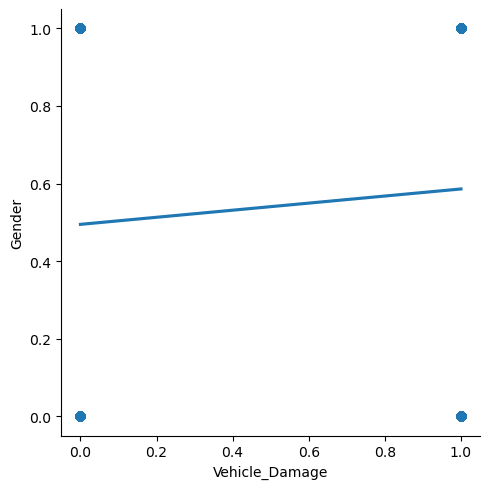

In [93]:
sns.lmplot(x="Vehicle_Damage", y="Gender", data=data);

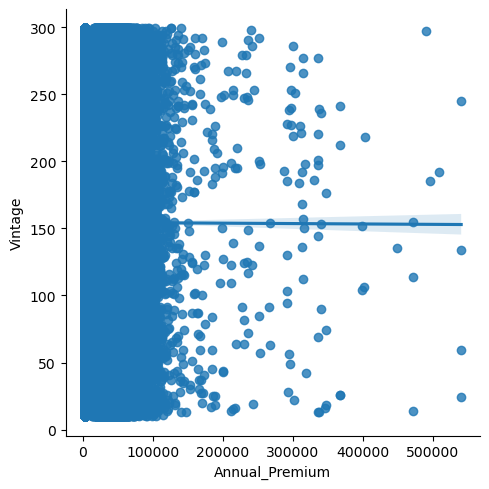

In [94]:
sns.lmplot(x="Annual_Premium", y="Vintage", data=data);

1. Para fazer:
relação DamageVeichle com o genero
relação region_code com veiculo Demage

<Axes: xlabel='Age', ylabel='Density'>

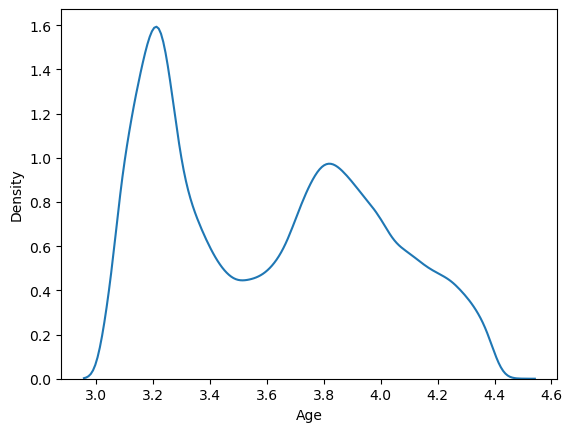

In [18]:
sns.kdeplot(FunctionTransformer(func = np.log1p).fit_transform(data["Age"]))

**Gráfico que analisa a variável Age numa distribuição Normal para analisar em que idade são constatados o maior numero de dados deste dataset.**

Distribuição Normal da variável 

 **Rever**